▼顔検出カスケードファイルをダウンロードしよう

https://github.com/opencv/opencv/tree/master/data/haarcascades

顔の座標= 319 308 405 405


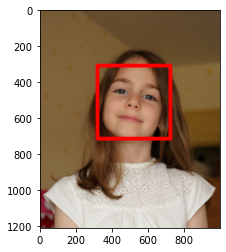

In [3]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイルを指定して検出器を作成
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# girl.jpgという画像を読み込んでグレイスケールに変換する
img = cv2.imread('girl.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行
# minSize – 物体が取り得る最小サイズ．これよりも小さい物体は無視されます
# face_listの中に検出した顔の位置情報が格納されている
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# 結果を確認 （face_listの長さ＝０の場合は何も検出できなかったとみなし、「失敗」と表示し終了）
if len(face_list) == 0:
    print("失敗")
    quit()
# 認識した部分に印をつける
for (x, y, w, h) in face_list:
    print("顔の座標=", x, y, w, h)
#     赤線用データを用意
#     青　緑　赤
    red =  (0, 0, 255)
#     thickness:線の細さ
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

#画像を出力
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# モザイクをかける処理を実装
import cv2

def mosaic(img, rect, size):
    # モザイクをかける領域を取得
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    # モザイク処理のため、一度縮小して拡大する
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation = cv2.INTER_AREA)
    
    # 画像にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

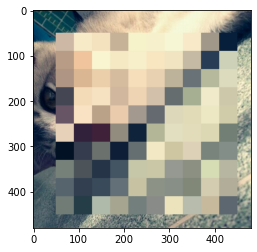

In [5]:
import matplotlib.pyplot as plt
import cv2
# from mosaic import mosaic as mosaic

# cat.jpgデータを読み込んでモザイクをかける
# mosaic関数は、一つ前のセルで実装済みのものを呼び出す
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

# モザイクをかけた画像を出力
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

face_list= [[579 312 191 191]
 [290  98 227 227]]


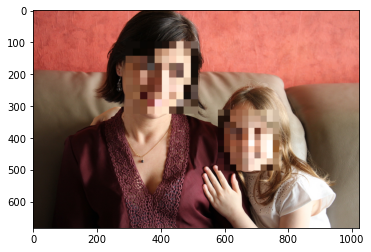

In [6]:
import matplotlib.pyplot as plt
import cv2
# from mosaic import mosaic as mosaic

# カスケードファイル「haarcascade_frontalface_alt.xml」を指定
cascade_file = 'haarcascade_frontalface_alt.xml'
# 分類機を作成 
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込む
img = cv2.imread('family.jpg')
# グレイスケール（白黒）に変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔検出を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# face_listの長さが0なら終了
if len(face_list) == 0:
    print('失敗')
    quit()

# face_listの内容を確認
print('face_list=', face_list)

# 認識した部分の画像にモザイクをかける
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

練習１：
「family.jpg」を使って目の位置を検出し、目の位置に緑の線を描画するプログラムを作成しましょう。
出力例のように、目として検出された位置も表示してください。

ヒント：
・目の位置の検出には「haarcascade_eye.xml」を使用する

目の座標= 344 149 57 57
目の座標= 607 357 60 60
目の座標= 673 354 63 63
目の座標= 407 165 67 67
目の座標= 538 182 76 76


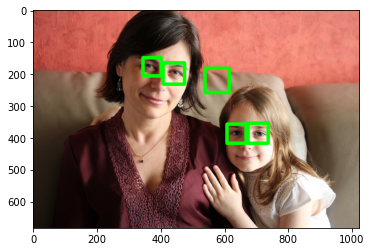

In [7]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイル「haarcascade_frontalface_alt.xml」を指定
eye_cascade_file = 'haarcascade_eye.xml'
# 分類機を作成 
eye_cascade = cv2.CascadeClassifier(eye_cascade_file)

# 画像の読み込む
img = cv2.imread('family.jpg')

# グレイスケール（白黒）に変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 目の検出を実行
eyes = eye_cascade.detectMultiScale(img_gray, minSize=(50, 50))

# face_listの長さが0なら終了
if len(eyes) == 0:
    print('失敗')
    quit()

# 認識した部分の画像に四角を描画する
for x, y, w, h in eyes:
    print("目の座標=", x, y, w, h)
#   緑色のデータを用意
    green = (0, 255, 0)
    cv2.rectangle(img, (x, y), (x+w, y+h), green, thickness=10)
          
#画像を出力
cv2.imwrite("eye_rectangle.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

練習２：
「family.jpg」を使って目の位置を検出し、検出した目の位置にぼかし処理（平滑化処理）を行い画面に表示するプログラムを作成してください。
ただし、テキストの「mosaic関数」（P137）のように、平滑化する処理を関数化して実装すること。関数名は「mouthblur」としてください。
検出した目の位置にぼかし処理（平滑化処理）を行った画像のファイル名を「blur1.jpg」として保存してください。

ヒント：
・平滑化は「OpenCV blur」で調べる（データサイエンスの授業で実施済み）

さらにヒント：
OpenCVで「ぼかし処理」を行う
https://qiita.com/wakaba130/items/3a9f0dd23dfacc5b4602

In [8]:
# 平滑化処理を実装
import cv2

def mouthblur(img, rect, size):
    # 平滑化処理を行う領域を取得
    (x1, y1, x2, y2) = rect
    i_rect = img[y1:y2, x1:x2]
    
    # 平滑化処理を行う  
    s_roi = img[y1: y2, x1: x2]
    s_roi = cv2.blur(s_roi, (30, 30))
    
    # 画像に平滑化処理をした画像を重ねる
    img[y1: y2, x1: x2] = s_roi
    return img

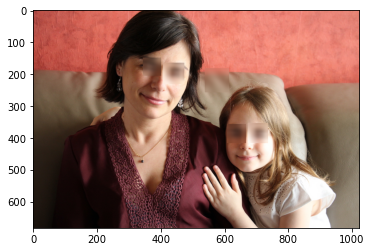

In [9]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイル「haarcascade_frontalface_alt.xml」を指定
eye_cascade_file = 'haarcascade_eye.xml'
# 分類機を作成 
eye_cascade = cv2.CascadeClassifier(eye_cascade_file)

# 画像の読み込む
img = cv2.imread('family.jpg')

# グレイスケール（白黒）に変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 目の検出を実行
eyes_mozaiku = eye_cascade.detectMultiScale(img_gray, minSize=(50, 50))

# face_listの長さが0なら終了
if len(eyes_mozaiku) == 0:
    print('失敗')
    quit()

# 認識した部分に平滑化処理を描画する
for x, y, w, h in eyes:
    img = mouthblur(img, (x, y, x+w, y+h), 5)
          
#画像を出力
cv2.imwrite("blur1.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()